<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<img src = "https://github.com/Jangrae/img/blob/master/air.png?raw=true" width=800 align="left"/>

# 실습 내용

- 머신러닝 모델링을 위한 코딩은 무조건 할 수 있어야 합니다.
- 코딩 내용을 자세히 알지 못해도 **무작정** 코딩을 진행해봅니다.
- AirQuality 데이터를 대상으로 모델링 해서 오존 농도를 예측해 봅니다.
- LinearRegression 알고리즘을 사용합니다.

- 우선 sklearn 버전을 확인하고 필요 시 업그레이드 합니다.

In [1]:
# sklearn 버전 확인
import sklearn
print(sklearn.__version__)   # 1.0.2

1.0.2


In [2]:
# sklearn 버전 업그레이드
!pip install scikit-learn --user --upgrade

     ---------------------------------------- 8.4/8.4 MB 9.5 MB/s eta 0:00:00
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)


- 업그레이를 하게 되면 Kernel 재시작 후 버전을 다시 확인합니다.

In [1]:
# sklearn 버전 확인
import sklearn
print(sklearn.__version__)   # 1.2.1

1.2.1


# 1.환경 준비

- 기본 **라이브러리**와 대상 **데이터**를 가져와 이후 과정을 준비합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_11.png?raw=true" width=700 align="left"/>

In [2]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

In [3]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/airquality_simple.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 **충분히 이해**할 수 있도록 다양한 **탐색** 과정을 수행합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_12.png?raw=true" width=700 align="left"/>

In [37]:
# 상위 몇 개 행 확인
data.head()

,Ozone,Solar.R,Wind,Temp
0,41,190.0,7.4,67
1,36,118.0,8.0,72
2,12,149.0,12.6,74
3,18,313.0,11.5,62
4,19,313.0,14.3,56


In [38]:
# 하위 몇 개 행 확인
data.tail()

,Ozone,Solar.R,Wind,Temp
148,30,193.0,6.9,70
149,23,145.0,13.2,77
150,14,191.0,14.3,75
151,18,131.0,8.0,76
152,20,223.0,11.5,68


In [ ]:
# 변수 확인


In [39]:
# 기술통계 확인
data.describe()

,Ozone,Solar.R,Wind,Temp
count,153.000000,153.000000,153.000000,153.000000
mean,42.052288,186.032680,9.957516,77.882353
std,30.156127,90.698707,3.523001,9.465270
min,1.000000,7.000000,1.700000,56.000000
25%,20.000000,112.000000,7.400000,72.000000
50%,34.000000,203.000000,9.700000,79.000000
75%,59.000000,259.000000,11.500000,85.000000
max,168.000000,334.000000,20.700000,97.000000


In [4]:
# 상관관계 확인
data.corr()

,Ozone,Solar.R,Wind,Temp,Month,Day
Ozone,1.000000,0.280068,-0.605478,0.683372,0.174197,0.004419
Solar.R,0.280068,1.000000,-0.056792,0.275840,-0.075301,-0.150275
Wind,-0.605478,-0.056792,1.000000,-0.457988,-0.178293,0.027181
Temp,0.683372,0.275840,-0.457988,1.000000,0.420947,-0.130593
Month,0.174197,-0.075301,-0.178293,0.420947,1.000000,-0.007962
Day,0.004419,-0.150275,0.027181,-0.130593,-0.007962,1.000000


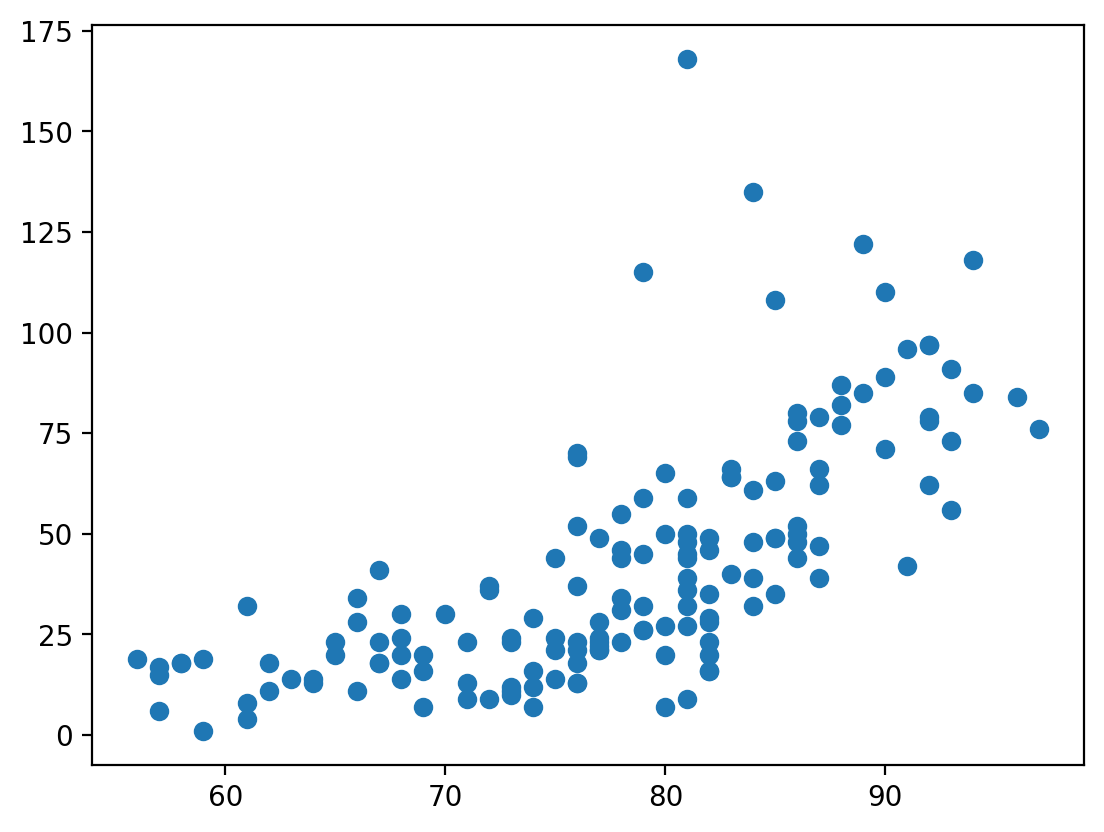

In [5]:
plt.scatter(data['Temp'],data['Ozone'])
plt.show()

<AxesSubplot:>

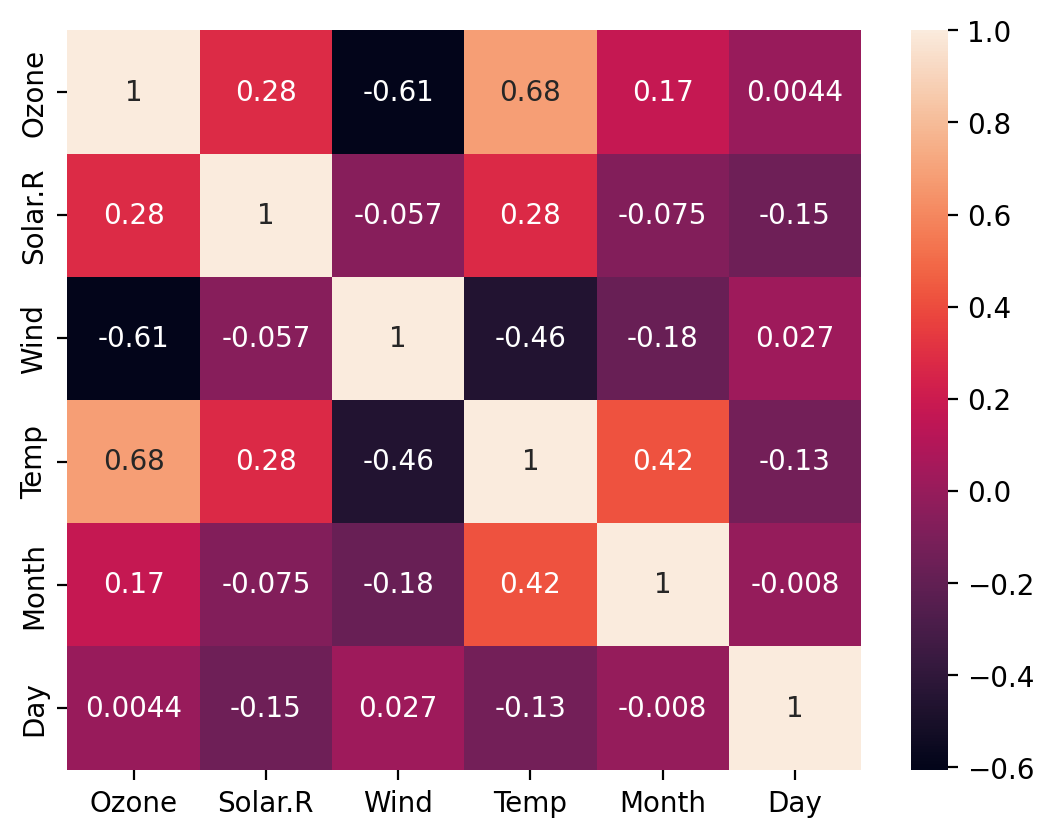

In [6]:
sns.heatmap(data.corr(), annot = True)

# 3.데이터 준비

- **전처리** 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_13.png?raw=true" width=700 align="left"/>

**1) 결측치 처리**

- 결측치가 있으면 제거하거나 적절한 값으로 채웁니다.

In [9]:
# 결측치 확인
data.isnull().sum()

Ozone      0
Solar.R    7
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

In [10]:
# 전날 값으로 결측치 채우기

data.fillna(method = 'ffill', inplace =True)
# 확인
data.isna().sum()

Ozone      0
Solar.R    0
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

**2) 변수 제거**

- 분석에 의미가 없다고 판단되는 변수는 제거합니다.

In [11]:
# 변수 제거

drop_cols = ['Month','Day']
data.drop(drop_cols, axis = 1 , inplace = True)
# 확인


**3) x, y 분리**

- 우선 target 변수를 명확히 지정합니다.
- target을 제외한 나머지 변수들 데이터는 x로 선언합니다.
- target 변수 데이터는 y로 선언합니다. 
- 이 결과로 만들어진 x는 데이터프레임, y는 시리즈가 됩니다.
- 이후 모든 작업은 x, y를 대상으로 진행합니다.

In [12]:
# target 확인

target = 'Ozone'

# 데이터 분리
x = data.drop(target, axis = 1)
y = data.loc[:, target]


**4) 학습용, 평가용 데이터 분리**

- 학습용, 평가용 데이터를 적절한 비율로 분리합니다.
- 반복 실행 시 동일한 결과를 얻기 위해 random_state 옵션을 지정합니다.

In [16]:
# 모듈 불러오기

from sklearn.model_selection import train_test_split
# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x , y, 
                                                    test_size = 0.3,
                                                    shuffle = True, # 기본값 : 섞은 후 나눈 다
                                                    random_state=1) # 정수로 넣으면 건수, 실수로하면 퍼센트

In [17]:
#확인
x_train[:10]

,Solar.R,Wind,Temp
132,259.0,9.7,73
73,175.0,14.9,81
18,322.0,11.5,68
48,37.0,9.2,65
4,313.0,14.3,56
45,322.0,11.5,79
75,48.0,14.3,80
39,291.0,13.8,90
36,264.0,14.3,79
118,153.0,5.7,88


# 4.모델링

- 본격적으로 모델을 **선언**하고 **학습**하고 **평가**하는 과정을 진행합니다.
- 우선 **회귀** 문제인지 **분류** 문제인지 명확히 구분합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_14.png?raw=true" width=700 align="left"/>

**1) 모델링**

- 회귀 문제 인가요? 분류 문제인가요?
- 회귀인지 분류인지에 따라 사용할 알고리즘과 평가 방법이 달라집니다.
- 우선 다음 알고리즘과 평가 방법을 사용합니다.
    - 알고리즘: LinearRegression
    - 평가방법: mean_absolute_error

In [ ]:
# 1단계: 불러오기
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# 2단계: 선언하기
model = LinearRegression()

# 3단계: 학습하기
model.fit(x_train,y_train)

# 4단계: 예측하기
y_pred = model.predict(x_test)

# 실제값과 예측값 비교
print(y_test.values[:10]) #시리즈 --> 배열 
print(y_pred[:10]) #배열

# 5단계: 평가하기
mean_absolute_error(y_test, y_pred) 

# 6단계 : 실제값과 예측값 시각화
plt.plot(y_test.values , label='Actual')    
plt.plot(y_pred, label='Predicted')
plt.axhline(mean_ozone, color = 'red', linestyle='--')  
plt.legend()
plt.show()

In [19]:
# 1단계: 불러오기
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [21]:
# 2단계: 선언하기
model = LinearRegression()

In [22]:
# 3단계: 학습하기
model.fit(x_train,y_train)

LinearRegression()

In [23]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [24]:
# 실제값과 예측값 비교
print(y_test.values[:10]) #시리즈 --> 배열 
print(y_pred[:10]) #배열

[24 18 97 47 34 22 66 18 69 27]
[13.84003067  5.82919112 81.93563027 58.41267418 50.86150737 31.52971121
 66.8083547  -8.56411529 50.2136544  39.13346172]


In [26]:
# 5단계: 평가하기
mean_absolute_error(y_test, y_pred) 

13.976843190385711

In [35]:
mean_ozone =  data['Ozone'].mean()

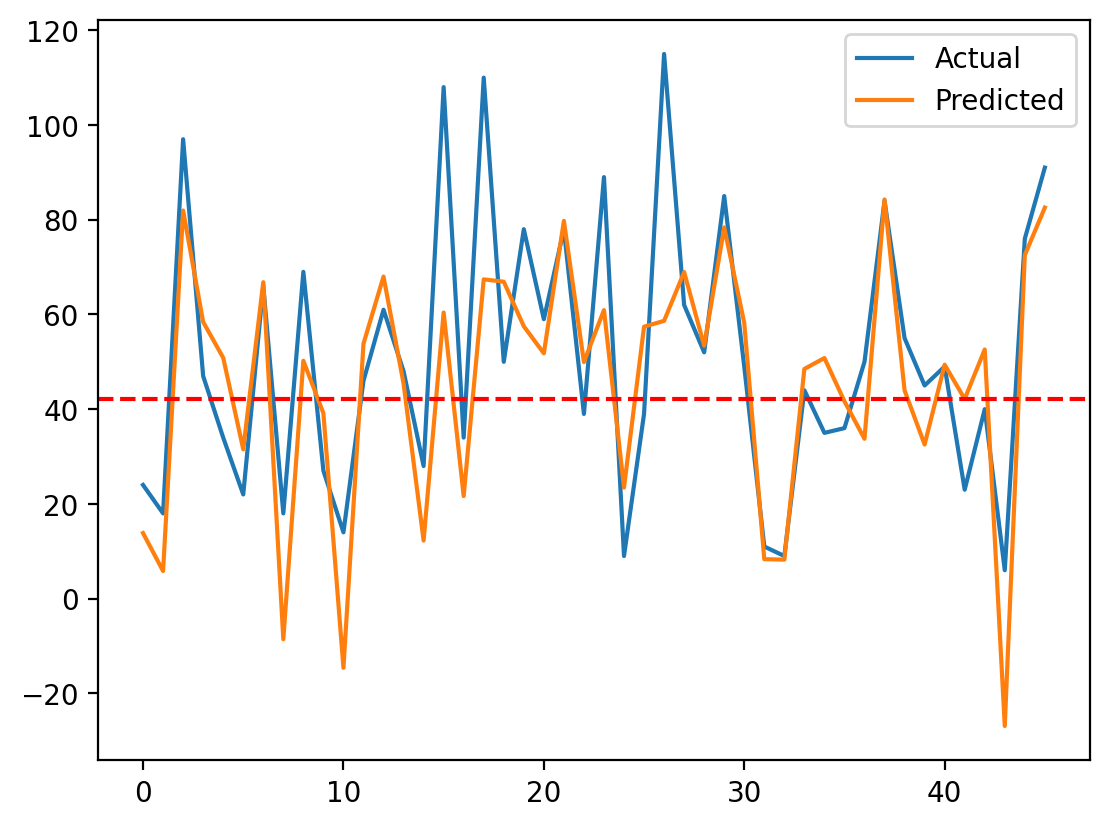

In [36]:
# 6단계 : 실제값과 예측값 시각화
plt.plot(y_test.values , label='Actual')    
plt.plot(y_pred, label='Predicted')
plt.axhline(mean_ozone, color = 'red', linestyle='--')  
plt.legend()
plt.show()